In [4]:
import numpy as np
from sklearn.linear_model import Ridge
from scipy.optimize import brent
import matplotlib.pyplot as plt
%matplotlib inline

class CoordDescent(object):
    '''
    Attributes:        
        lamda (float): penalizing constant for 1-norm of beta
        beta (ndarray): an array of shape (d,) for d features
    '''
    
    def __init__(self, lamda):        
        self.lamda = lamda
        self.beta = None
        
    def fit_ridge(self, x, y, lamda):
        '''
        Args:
            x (ndarray): an array of shape (n,d) 
                         for n points, d features NOT incl constant
            y (ndarray): an array of shape (n,) for n points
            lamda (float): penalizing constant for 1-norm of beta
        Returns:
            ndarray: ridge beta, an array of shape (d,) for d features
        '''
        reg = Ridge(alpha=lamda, fit_intercept=True)
        reg.fit(x,y)
        return reg.coef_
    
    def fit(self, x, y):
        '''
        Args:
            x (ndarray): an array of shape (n,d) 
                         for n points, d features NOT incl constant
            y (ndarray): an array of shape (n,) for n points        
        Returns:
            ndarray: update and return self.beta 
                     using squared loss and norm-1 regularization                     
        '''
        self.beta = self.fit_ridge(x, y, self.lamda)

        def objective(b, i):
            new_beta = np.concatenate((self.beta[:i], np.array([b]), 
                                       self.beta[i+1:]))
            loss = np.linalg.norm(y - x.dot(new_beta))**2
            loss += self.lamda * np.linalg.norm(new_beta, ord=1)
            return loss

        has_change, count, tol = True, 0, 1e-4
        while has_change and count < 100:
            has_change = False
            for i in range(self.beta.size):
                prev = self.beta[i]
                self.beta[i] = brent(objective, args=(i,))                 
                if abs(prev - self.beta[i]) > tol:
                    has_change = True
            count += 1
        return self.beta

In [24]:
X = np.random.randn(500, 10)
y = 3 * X[:,1] + 17 * X[:,2] + np.random.randn(500)
lamdas = np.arange(5,150,5)
betas = np.zeros((1,10))
for lamda in lamdas:
    reg = CoordDescent(lamda)       
    beta = reg.fit(X, y).reshape(1,10)
    betas = np.concatenate((betas, beta), axis=0)

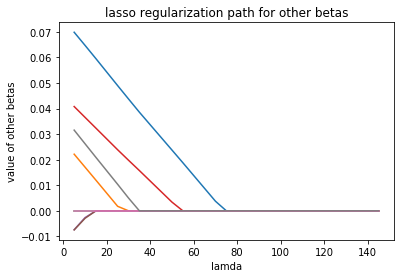

In [26]:
plt.plot(lamdas, betas[1:,0], lamdas, betas[1:,3:])
plt.xlabel('lamda')
plt.ylabel('value of other betas')
plt.title('lasso regularization path for other betas')